In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [0]:
# get classifier
classifier_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape = (224, 224, 3))])


# get data
data_url = 'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_root = tf.keras.utils.get_file(data_url, untar=True)

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)


#get label data
label_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt' ,label_url)
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [0]:
for image_batch, label_batch in image_data:
    print('Image batch shape: '', image_batch.shape)
    print('Label batch shape: '', label_batch.shape)
    break

In [0]:
result_batch = classifier.predict(image_batch)
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis = -1)]

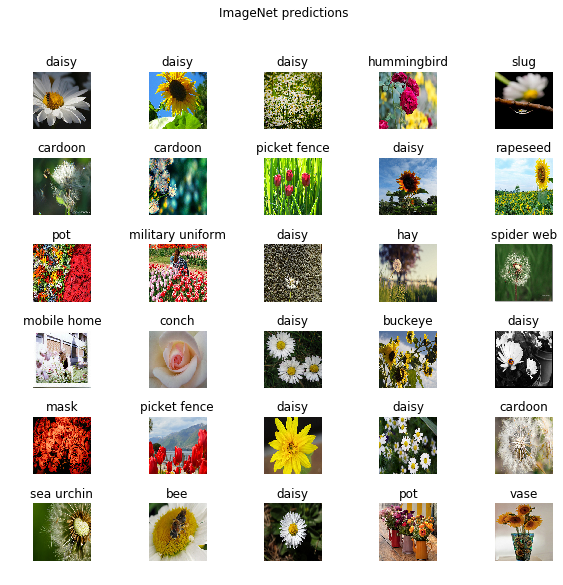

In [22]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')

_ = plt.suptitle("ImageNet predictions")